In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [56]:
#read the data 
df = pd.read_excel('oedi_data.xlsx', sheet_name='data')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   randid                    51504 non-null  object        
 1   Date                      51504 non-null  datetime64[ns]
 2   NOAAClimRegion            51504 non-null  object        
 3   TempZone                  51504 non-null  object        
 4   HumidZone                 51504 non-null  object        
 5   bin_PlantSize_kW          51504 non-null  object        
 6   plant_age_months          51356 non-null  float64       
 7   active_snow_tickets       51504 non-null  object        
 8   snow_bin_ticket_minutes   790 non-null    object        
 9   snow_affected_assets      790 non-null    object        
 10  snow_production_level     51437 non-null  object        
 11  PR                        49940 non-null  float64       
 12  snow_value_mm     

In [58]:
df.reset_index()

,index,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,...,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,0,C2S1,2018-04-01,West,T6,H4,large,19.0,No,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,1,C2S1,2018-04-02,West,T6,H4,large,19.0,No,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,2,C2S1,2018-04-03,West,T6,H4,large,19.0,No,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,3,C2S1,2018-04-04,West,T6,H4,large,19.0,No,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,4,C2S1,2018-04-05,West,T6,H4,large,19.0,No,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51499,51499,C3S40,2019-07-27,Southeast,T5,H4,medium,31.0,No,NaN,...,NaN,Unknown,0,0.0,0,57,0.0,0,315,0.0
51500,51500,C3S40,2019-07-28,Southeast,T5,H4,medium,31.0,No,NaN,...,NaN,Unknown,0,0.0,0,58,0.0,0,316,0.0
51501,51501,C3S40,2019-07-29,Southeast,T5,H4,medium,31.0,No,NaN,...,NaN,Unknown,0,0.0,0,59,0.0,0,317,0.0
51502,51502,C3S40,2019-07-30,Southeast,T5,H4,medium,31.0,No,NaN,...,NaN,Unknown,0,0.0,0,60,0.0,0,318,0.0


In [59]:
df.head()

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,C2S1,2018-04-01,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,C2S1,2018-04-02,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,C2S1,2018-04-03,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,C2S1,2018-04-04,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,C2S1,2018-04-05,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0


In [70]:
# weather onset 
df['weather_onset'] = (
    (df['active_snow_tickets'] == 'Yes') |
    (df['snow_bin_ticket_minutes'] == 'Yes') |
    (df['hurricane']== 1) |
    (df['storm'] == 1) |
    (df['flood']== 1) |
    (df['rain']== 1) |
    (df['lightning'] == 1)
)

In [71]:
# how many weather events within one year 
event_check = df[df['weather_onset']]
event_check

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain,weather_onset
16,C2S1,2018-04-17,West,T6,H4,large,19.0,No,NaN,NaN,...,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,True
31,C2S1,2018-05-02,West,T6,H4,large,20.0,No,NaN,NaN,...,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,True
41,C2S1,2018-05-12,West,T6,H4,large,20.0,No,NaN,NaN,...,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,True
109,C2S1,2018-07-19,West,T6,H4,large,23.0,No,NaN,NaN,...,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,True
195,C2S1,2018-10-13,West,T6,H4,large,25.0,No,NaN,NaN,...,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,C3S40,2019-07-12,Southeast,T5,H4,medium,30.0,No,NaN,NaN,...,Unknown,0,0.0,0,42,0.0,0,300,1.0,True
51485,C3S40,2019-07-13,Southeast,T5,H4,medium,30.0,No,NaN,NaN,...,Unknown,0,0.0,0,43,0.0,0,301,1.0,True
51486,C3S40,2019-07-14,Southeast,T5,H4,medium,30.0,No,NaN,NaN,...,Unknown,0,0.0,0,44,0.0,0,302,1.0,True
51490,C3S40,2019-07-18,Southeast,T5,H4,medium,30.0,No,NaN,NaN,...,Unknown,0,0.0,0,48,0.0,0,306,1.0,True


In [72]:
#percentage of weather events across the database (within one year)
event_per = (event_check.shape[0]/df.shape[0]) * 100
event_per

24.58255669462566

In [73]:
# make weekly 
df['Week'] = df['Date'].dt.to_period('W').dt.start_time

weekly_df = df.groupby(['NOAAClimRegion', 'Week']).agg({
    'PR': 'mean',
    'weather_onset': 'any'  # If any event occurred that week
}).reset_index()

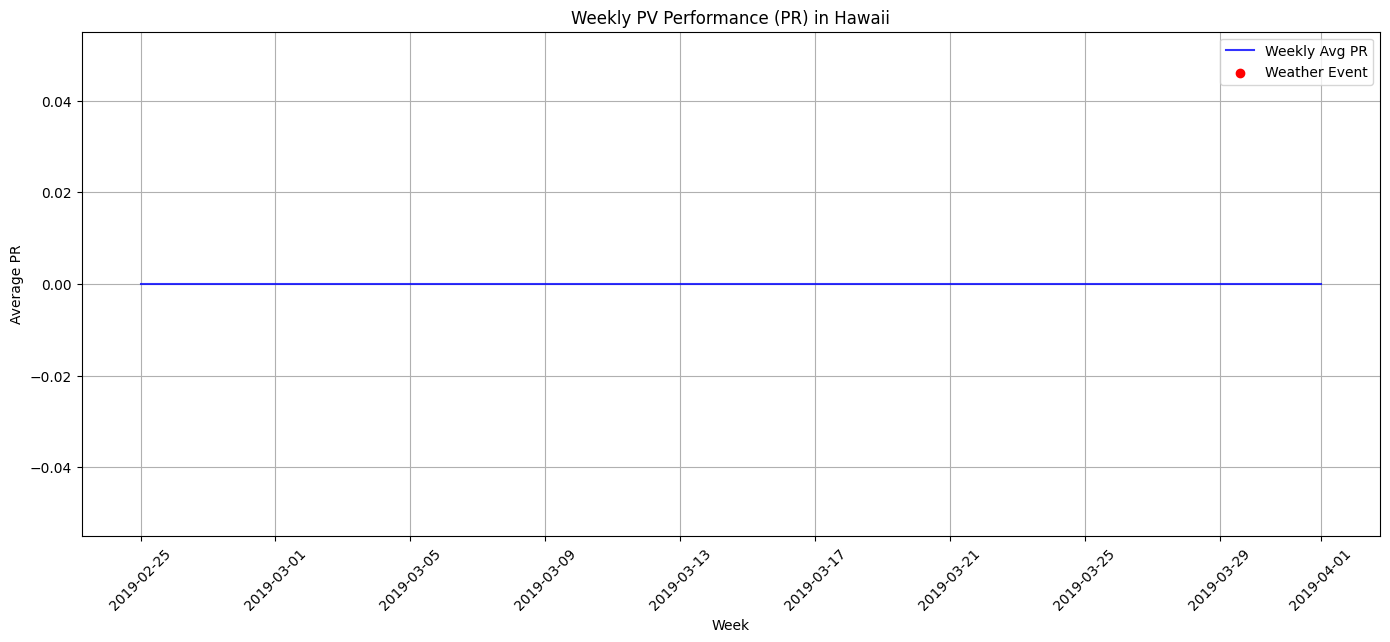

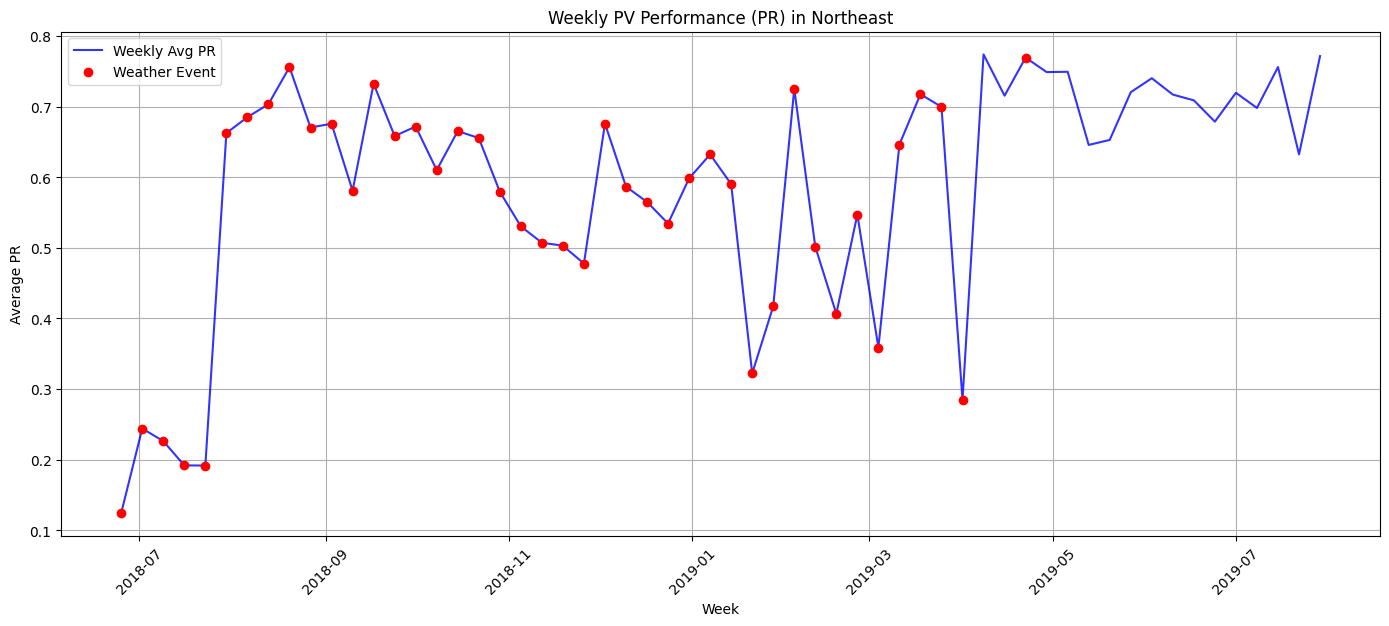

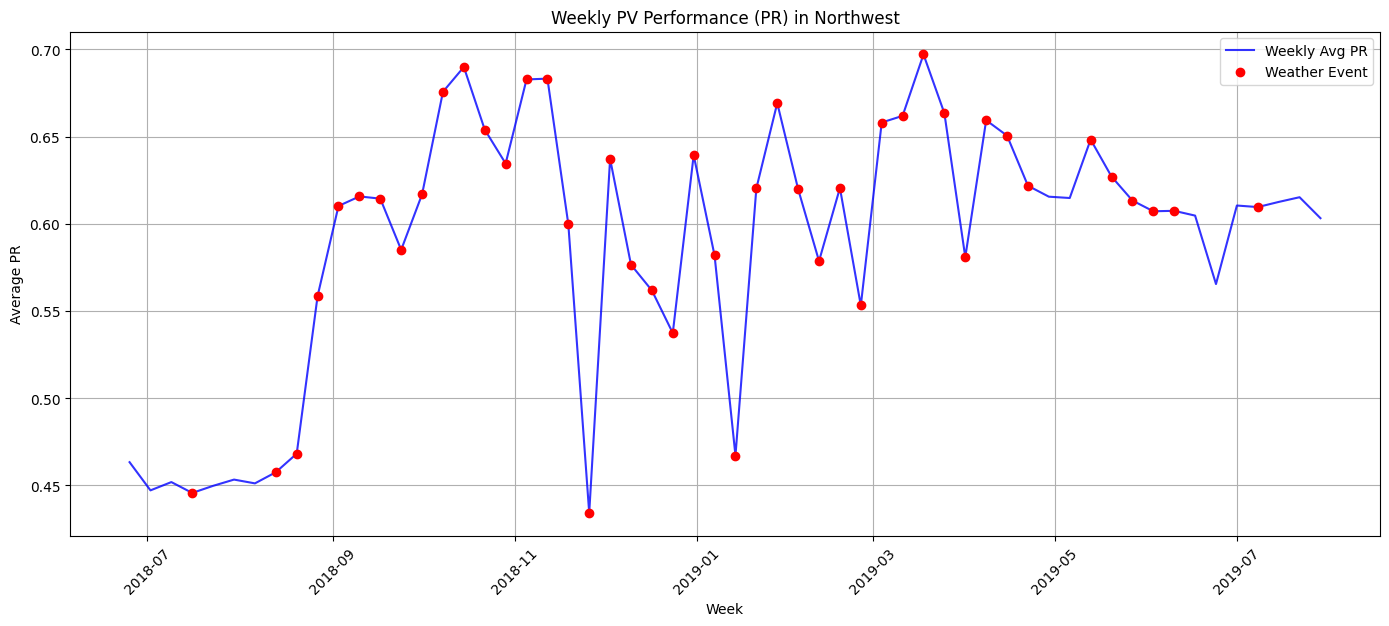

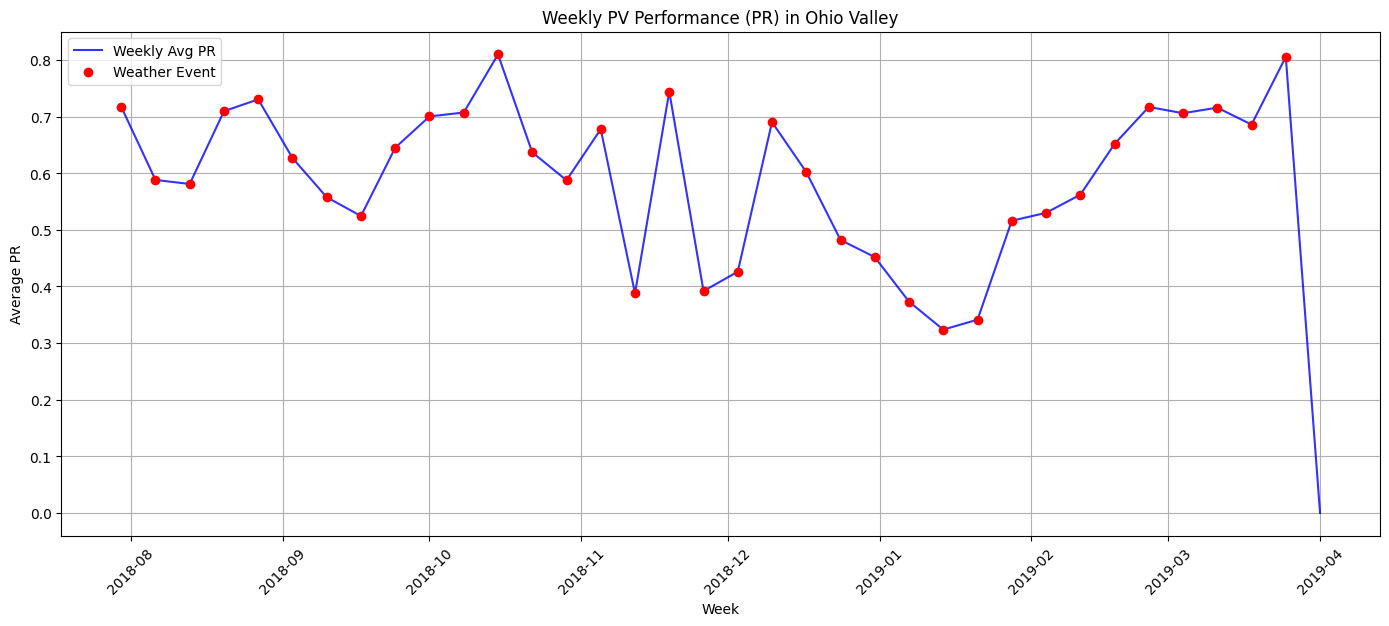

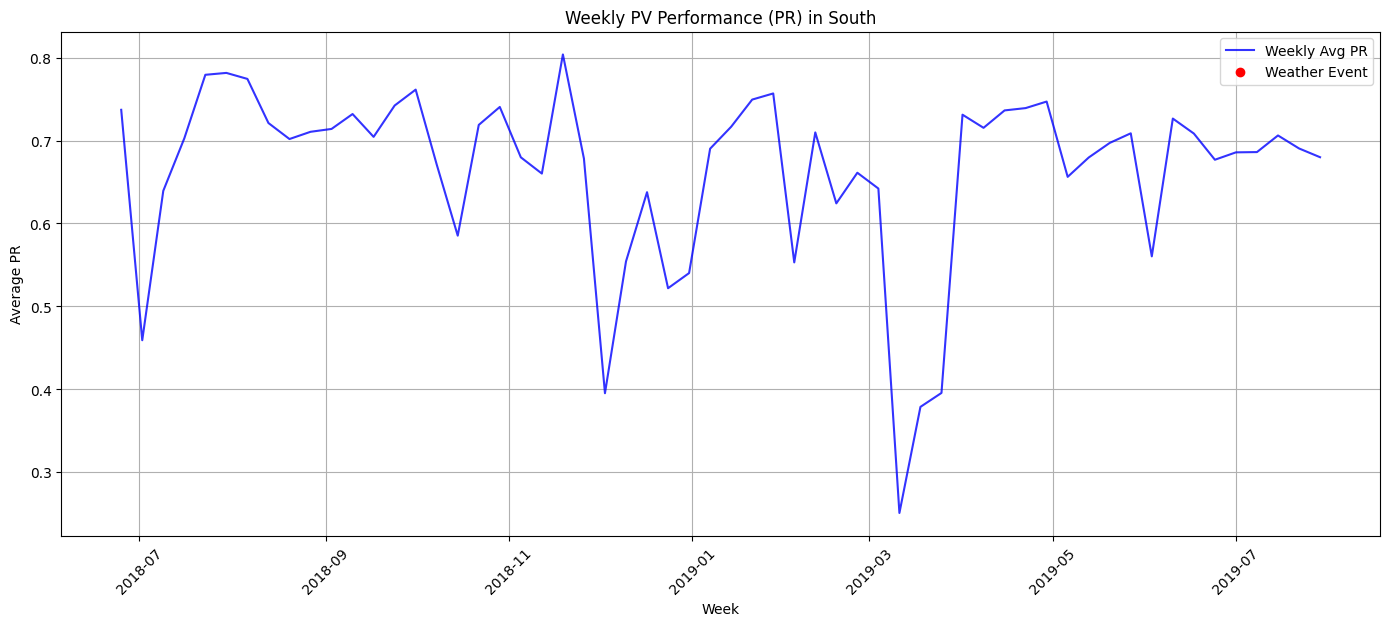

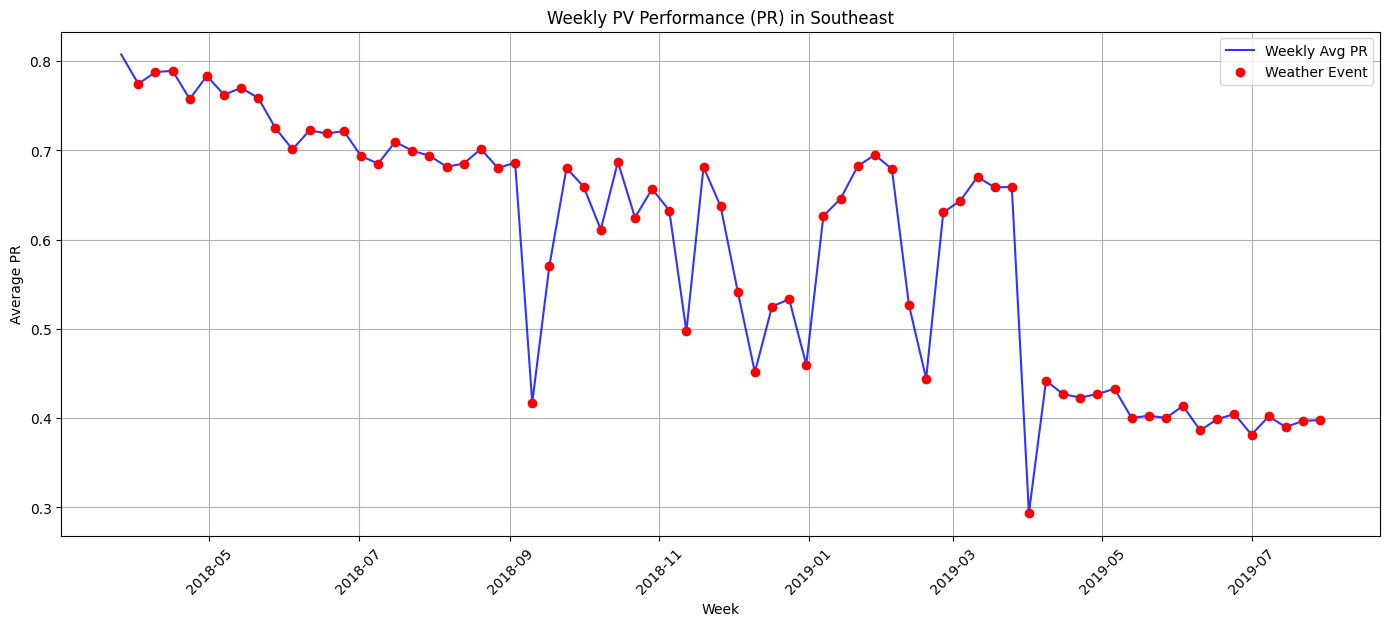

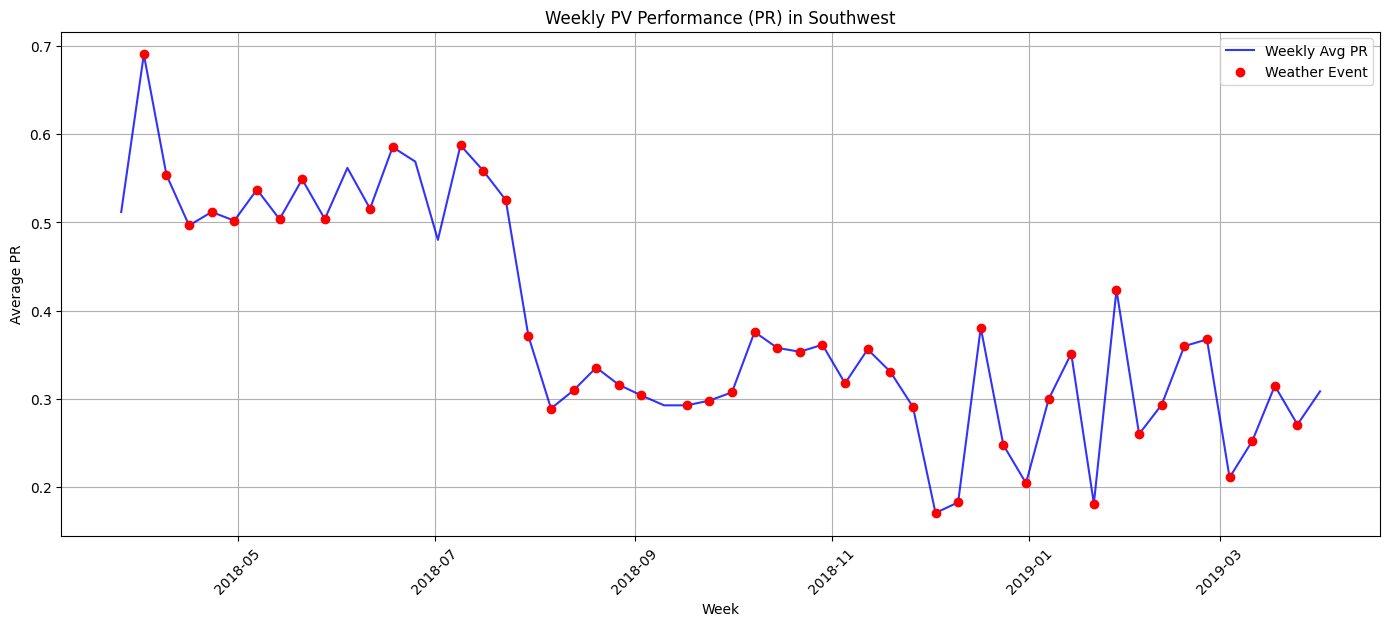

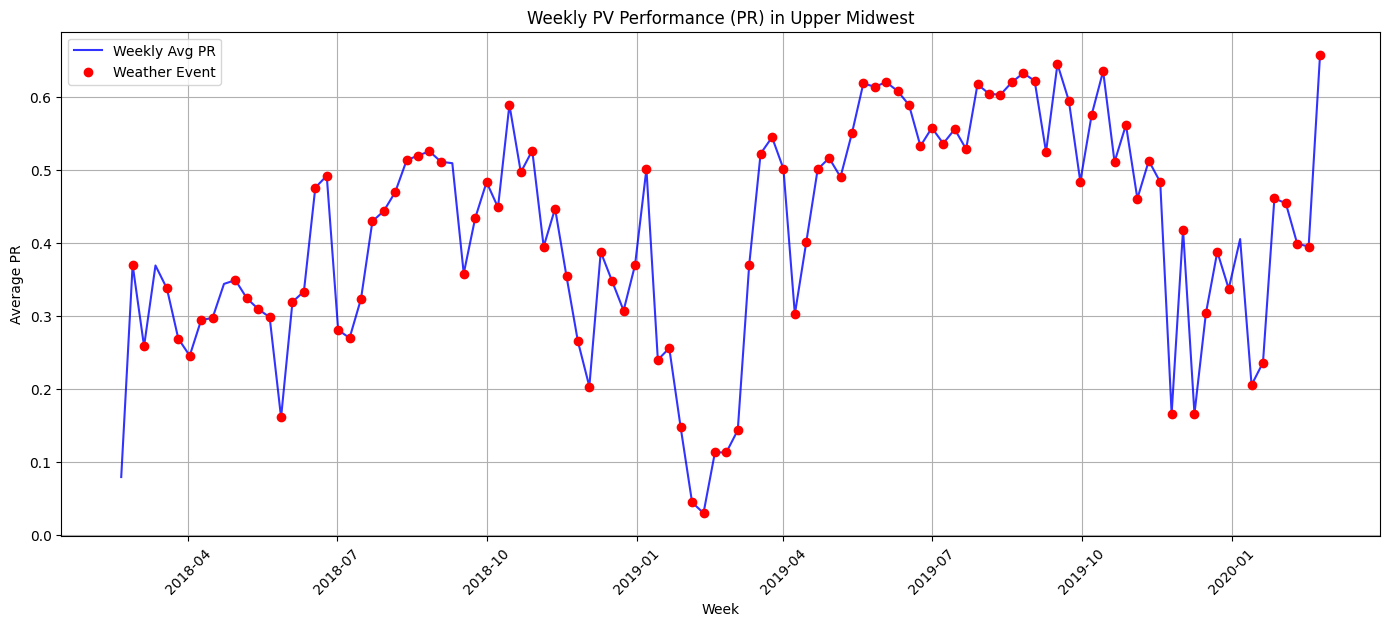

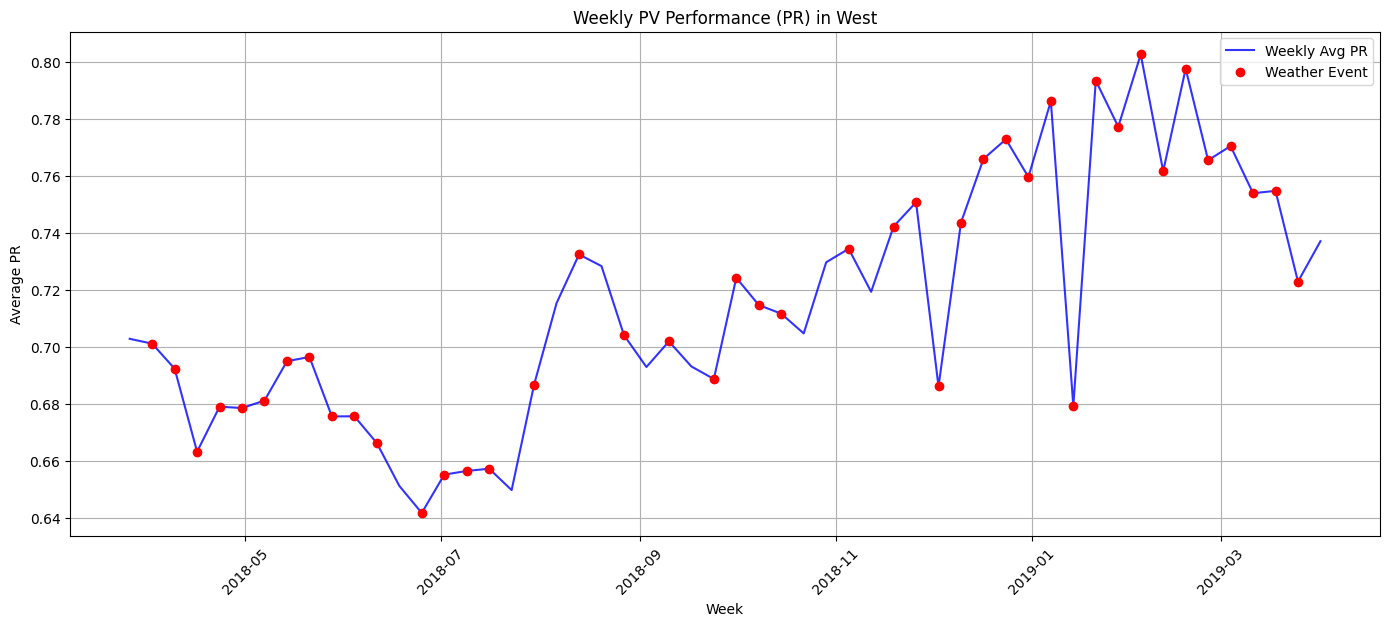

In [75]:
# visualize
for region in weekly_df['NOAAClimRegion'].unique():
    region_data = weekly_df[weekly_df['NOAAClimRegion'] == region]

    plt.figure(figsize=(14, 6))
    plt.plot(region_data['Week'], region_data['PR'], label='Weekly Avg PR', color='blue', alpha=0.8)

    # Add red dots for weeks with weather events
    weather_weeks = region_data[region_data['weather_onset']]
    plt.scatter(weather_weeks['Week'], weather_weeks['PR'], color='red', label='Weather Event', zorder=5)

    plt.title(f'Weekly PV Performance (PR) in {region}')
    plt.xlabel('Week')
    plt.ylabel('Average PR')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

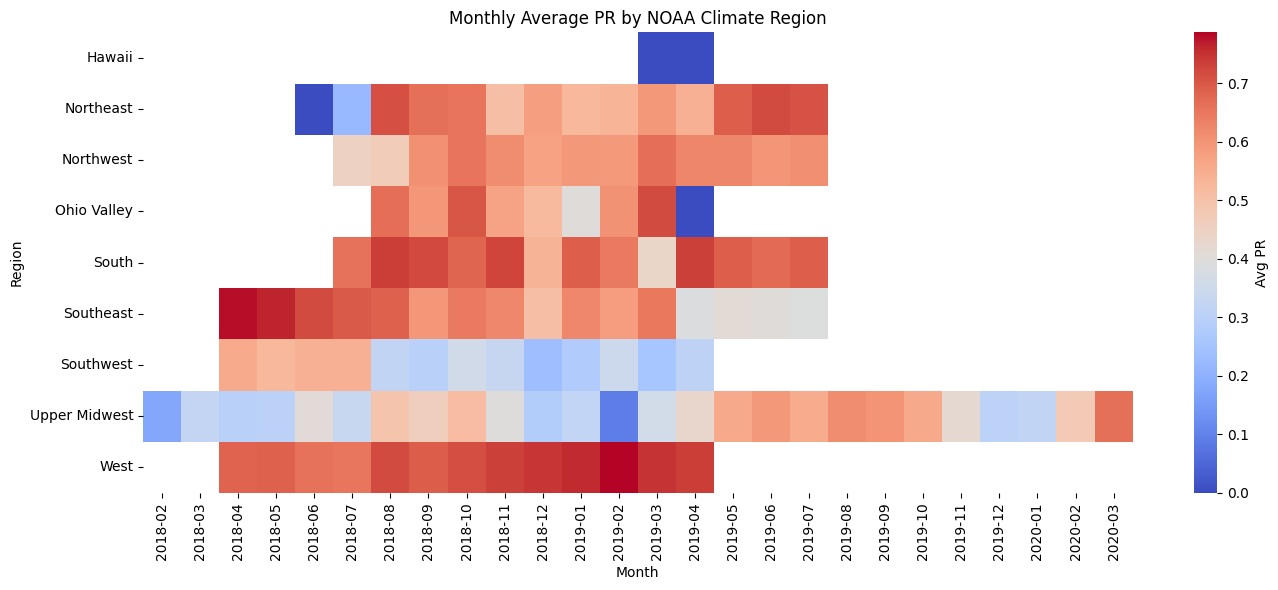

In [76]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# Monthly avg PR by region
monthly = df.groupby(['NOAAClimRegion', 'YearMonth'])['PR'].mean().unstack(0)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(monthly.T, cmap='coolwarm', annot=False, cbar_kws={'label': 'Avg PR'})
plt.title('Monthly Average PR by NOAA Climate Region')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()

In [79]:
df = df.sort_values(by='Date')
df['PR_change'] = df.groupby('randid')['PR'].diff()
df['PR_change']

45535         NaN
45536   -0.316077
45537    0.001223
50372         NaN
45538    0.012838
           ...   
46273    0.005452
50371   -0.132341
49750    0.011674
48531    0.010484
49139   -0.040231
Name: PR_change, Length: 51504, dtype: float64

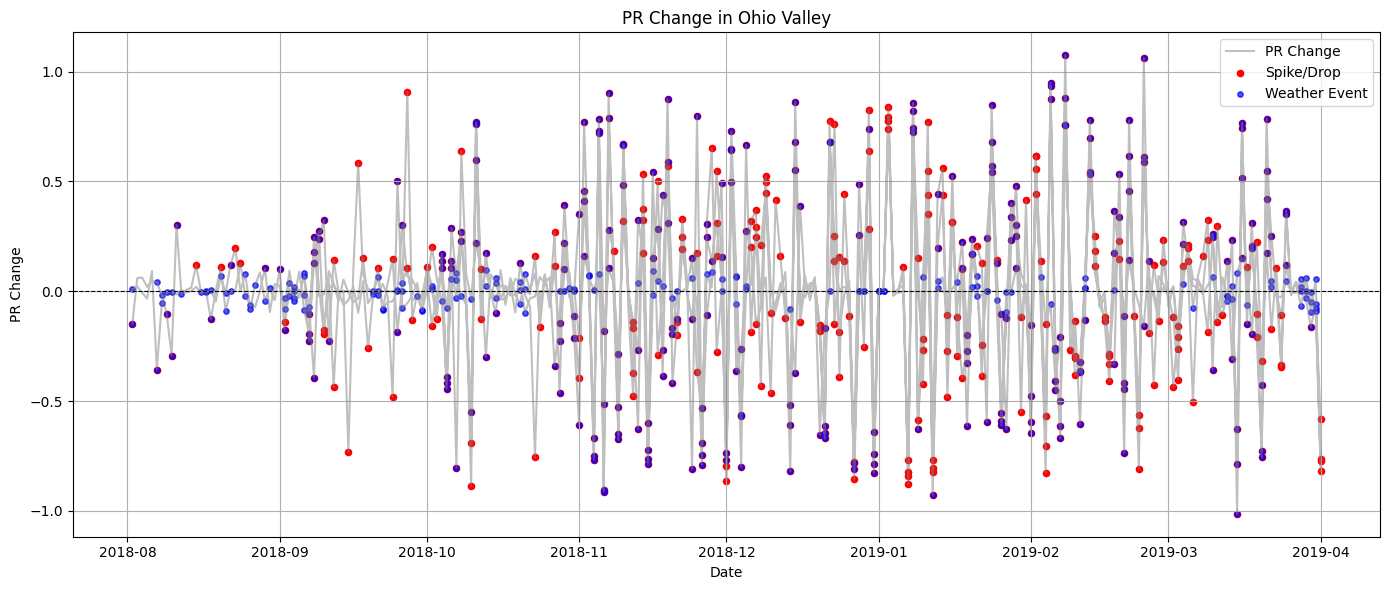

In [88]:
# anamoly threshold
threshold = 0.1
df['anomaly'] = df['PR_change'].abs() > threshold
region = 'Ohio Valley'
region_df = df[df['NOAAClimRegion'] == region]

plt.figure(figsize=(14, 6))
plt.plot(region_df['Date'], region_df['PR_change'], label='PR Change', color='gray', alpha=0.5)

plt.scatter(
    region_df[region_df['anomaly']]['Date'],
    region_df[region_df['anomaly']]['PR_change'],
    color='red', label='Spike/Drop', s=20
)

plt.scatter(
    region_df[region_df['weather_onset']]['Date'],
    region_df[region_df['weather_onset']]['PR_change'],
    color='blue', label='Weather Event', s=15, alpha=0.7
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(f'PR Change in {region}')
plt.xlabel('Date')
plt.ylabel('PR Change')
plt.legend()
plt.grid(True)
plt.tight_layout()